In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
from sklearn.datasets import fetch_openml

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

In [3]:
## load data from openml
df= fetch_openml(name='Fashion-MNIST',version=1)

c:\Users\sharsaur\Anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [43]:
## load from keras
#(train_images, train_labels),( test_images,test_labels)=tf.keras.datasets.mnist.load_data()
## Concatenate data and target
df=pd.concat([df.data,df.target],axis=1)

In [ ]:

# Get the column at the last position
last_column = df.iloc[:, -1]

# Drop the last column from the DataFrame
df = df.iloc[:, :-1]

# Insert the last column at the first position
df.insert(0, 'label', last_column)

# Now, df has the last column as the first column
print(df)

(70000, 785)

In [23]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df_concat, test_size=10000, random_state=1)

In [38]:
df_train_full.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
37262,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,4.0,0.0,72.0,219.0,174.0,0.0,0.0,0.0,0.0,4
13070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,142.0,200.0,...,110.0,158.0,18.0,0.0,3.0,0.0,0.0,0.0,0.0,0
3909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
60363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [25]:
df_train_full_array =np.array(df_train_full,dtype='float32')
df_test_array=np.array(df_test,dtype='float32')

In [7]:
df_train_full_array.shape

(60000, 784)

In [26]:
df_train_full_array

array([[0., 0., 0., ..., 0., 0., 4.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 6.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

'8'

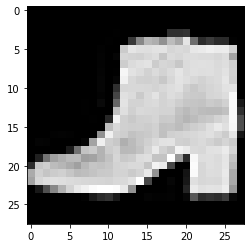

In [41]:
i = random.randint(1,60000)
plt.imshow(df_train_full_array[i,:-1].reshape((28,28)),cmap='gray')

label =df.target[i]
label

In [36]:
len(df_train_full_array)

60000

ValueError: cannot reshape array of size 785 into shape (28,28)

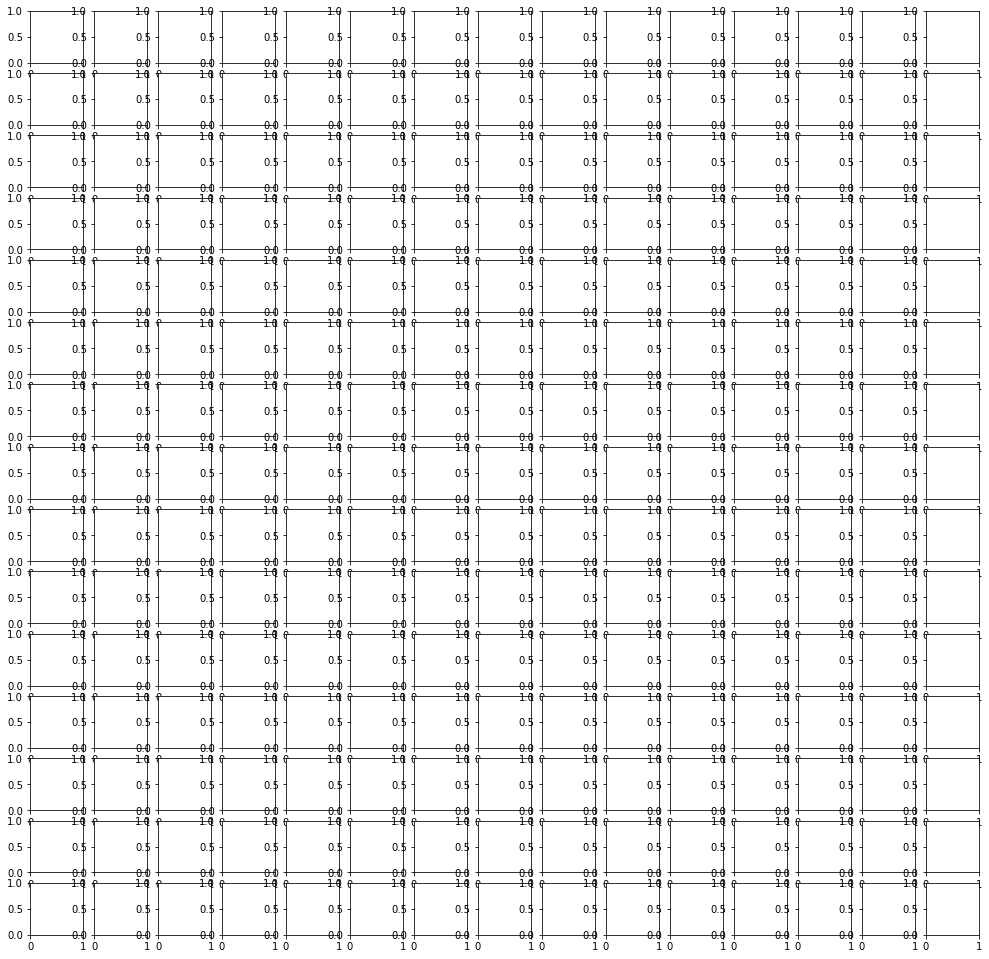

In [35]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(df_train_full_array) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( df_train_full_array[index,:].reshape((28,28)) )
    axes[i].set_title(df_train_full_array.iloc[index,-1], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

### Build and Train